In [266]:
import pandas as pd
import re
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from collections import defaultdict
import langdetect
import nltk.tokenize

In [267]:
song_data = pd.read_pickle('songData_noduplicates.df')

In [268]:
song_data.head()

,released,artists,lyrics,genres,title
0,1957,[marty robbins],El Paso Lyrics\nOut in the West Texas town of ...,[country],El Paso
1,1960-01-04,[frankie avalon],Why LyricsI'll never let you go\nWhy? Because ...,[pop],Why
3,1959,[johnny preston],Running Bear LyricsOn the bank of the river\nS...,[pop],Running Bear
4,1960-01-04,[freddy cannon],"Way Down Yonder in New Orleans LyricsWell, way...",[pop],Way Down Yonder in New Orleans
5,1960-01-04,[guy mitchell],Heartaches by the Number Lyrics\nHeartaches by...,"[country, cover]",Heartaches by the Number


## Removing title, "Lyrics" and unwanted unicode from the lyrics

In [269]:
for i in song_data.index.values:
    title = song_data.title[i]
    song_data.lyrics[i] = " ".join(song_data.lyrics[i].split("Lyrics")[1:])

In [270]:
for i in song_data.index.values:
    if "\u200e" in song_data.lyrics[i]:
        song_data.lyrics[i] = song_data.lyrics[i].replace('\u200e', '')

In [271]:
song_data.head()

,released,artists,lyrics,genres,title
0,1957,[marty robbins],\nOut in the West Texas town of El Paso\nI fel...,[country],El Paso
1,1960-01-04,[frankie avalon],I'll never let you go\nWhy? Because I love you...,[pop],Why
3,1959,[johnny preston],"On the bank of the river\nStood Running Bear, ...",[pop],Running Bear
4,1960-01-04,[freddy cannon],"Well, way down yonder in New Orleans\nIn the l...",[pop],Way Down Yonder in New Orleans
5,1960-01-04,[guy mitchell],"\nHeartaches by the number, troubles by the sc...","[country, cover]",Heartaches by the Number


## Removing songs that are not in english


In [272]:
for i in song_data.index.values:
    lyrics = " ".join([token for token in set(nltk.tokenize.word_tokenize(song_data.lyrics[i])) if token.isalpha()])
    if not lyrics:
#         print("NO GUT HERE")
#         print(song_data.artists[i])
#         print(song_data.title[i],"\n")

        song_data = song_data.drop(i)
        continue
    if langdetect.detect(lyrics) != "en":
        print(i)
#         print(song_data.artists[i])
#         print(song_data.title[i])
#         print(lyrics[:50],"\n")
        song_data = song_data.drop(i)
#     print(langdetect.detect(lyrics))
#     break

35
112
155
207
344
354
452
457
466
475
497
660
662
733
758
770
808
823
861
875
956
1004
1470
1545
1691
1707
1745
1994
2022
2239
2260
2493
2523
2587
2594
2817
2874
2898
2960
2995
3064
3080
3194
3542
3679
4179
4189
4202
4247
4250
4263
4613
4653
4710
4720
4757
5137
5167
6198
6208
6300
6321
6672
6735
6743
6825
6881
6968
6998
7100
7126
7299
7727
7838
7982
8206
8264
8460
8519
8622
8865
8996
9185
9201
9289
9482
9881
9887
10009
10098
10118
10208
10249
10278
10287
10366
10427
10806
10865
10930
11128
11182
11461
11653
12363
12641
12743
13598
13746
13950
14838
14930
15396
15679
15879
16417
17631
17869
17892
18399
18453
18558
18633
18644
18657
18973
19133
19149
19396
19785
19930
20185
20279
20504
20669
20823
21263
21302
21398
21429
21520
21525
21618
21628
21632
21636
21732
21735
21738
21810
21814
21849
21911
21964
21970
21988
21990
22124
22127
22166
22256
22287
22335
22436
22649
22711
23458
23526
23615
23618
23856
23916
23956
24107
24136
24271
24422
24743
24764
24772
24786
24944
24981
25145
25568


## Removing songs that are clearly loaded wrong

In [273]:
cut_list = ["genius users cypher", "world record"]
for cut in cut_list:
    for i in song_data.index.values:
        if cut in song_data.title[i].lower():
            song_data = song_data.drop(i)
            print(i, cut)

1491 genius users cypher
8166 genius users cypher
520 world record


In [274]:
cut_list = ["highest to lowest", "marcel proust", 'watsky', 'glee cast', 'harttsick', 'eric the red', 'fabvl', 'c-mob']
for cut in cut_list:
    for i in song_data.index.values:
        if cut in song_data.artists[i]:
            song_data = song_data.drop(i)
            print(i, cut)

18949 highest to lowest
20270 highest to lowest
22582 highest to lowest
27884 highest to lowest
273 marcel proust
431 marcel proust
714 marcel proust
781 marcel proust
1150 marcel proust
1161 marcel proust
3835 marcel proust
5397 marcel proust
12741 marcel proust
13 watsky
10618 watsky
3160 glee cast
22934 glee cast
22950 glee cast
23060 glee cast
23078 glee cast
23079 glee cast
23084 glee cast
23087 glee cast
23095 glee cast
23096 glee cast
23108 glee cast
23117 glee cast
23124 glee cast
23145 glee cast
23155 glee cast
23157 glee cast
23158 glee cast
23159 glee cast
23171 glee cast
23172 glee cast
23181 glee cast
23193 glee cast
23194 glee cast
23198 glee cast
23202 glee cast
23326 glee cast
23327 glee cast
23328 glee cast
23329 glee cast
23332 glee cast
23334 glee cast
23335 glee cast
23337 glee cast
23341 glee cast
23342 glee cast
23344 glee cast
23346 glee cast
23350 glee cast
23356 glee cast
23359 glee cast
23360 glee cast
23361 glee cast
23362 glee cast
23366 glee cast
23368 glee

## Song lengths

In [275]:
for i in song_data.index.values:
    if 'juice wrld' in song_data.artists[i]:
        print(song_data.title[i])
        print(len(song_data.lyrics[i]))
        #song_data = song_data.drop(i)

Lost Love
769
Bandit
3007
She’s the One
1607
Juice WRLD Hour Freestyle of Fire Over Eminem Beats
50633
Tim Westwood Freestyle
63066
Wasted
3608
Sometimes
2554
Lucid Dreams
2820
All Girls Are the Same
1545
Legends
1765
NO BYSTANDERS
3381
Lean wit Me
1989
Fine China
2195
Jet Lag
4199
Astronauts
2548
Yacht Club
2239
Make It Back
1572
Armed and Dangerous
2575
1400 / 999 Freestyle
3005
Nuketown
3229
MoshPit
2543
Demons and Angels
2664
Roses
2285
Robbery
2110
Hear Me Calling
2010
Empty
2577
Fast
2625
Maze
1190
Flaws and Sins
2461
Hate Me
2780
6 Kiss
2509
Let Me Know (I Wonder Why Freestyle)
2401
Godzilla
5019
PTSD
3302
Righteous
1717
Flex
2713
Tell Me U Luv Me
2473
GO
2297
Wishing Well
2075
Conversations
1807
Hate the Other Side
2656
Blood On My Jeans
2307
Titanic
2080
Bad Energy
1701
Stay High
2123
Fighting Demons
1997
Up Up and Away
1636
Screw Juice
1447
I Want It
2083
Can’t Die
1679
Man of the Year
1477
Smile
1857
Blastoff
2016
Real Shit
2290
Reminds Me Of You
2126
Bad Boy
2947
Life’s a M

### Removing long songs

In [276]:
i = -1 

while True:
    
    lengths = [len(lyrics) for lyrics in song_data.lyrics]
    a = np.argsort(lengths)[-1]
    
    index = song_data.index.values[a]
    
    if len(song_data.lyrics[index]) < 10_000:
        break
#     print(len(song_data.lyrics[index]))
#     print(song_data.artists[index])
#     print(song_data.title[index])
#     print(song_data.lyrics[index])
#     print("="*100)
    song_data = song_data.drop(index)

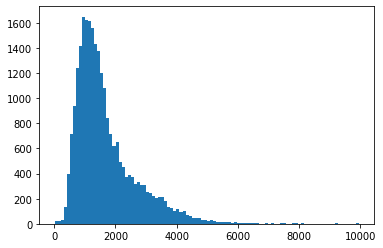

In [277]:
lengths = [len(lyrics) for lyrics in song_data.lyrics]
# lengths = sorted(lengths, reverse=True)
plt.hist(lengths, bins = 100)
plt.show()

## Regrouping artists

### Clean artist names

In [283]:
for i in song_data.index.values:
    a = song_data.artists[i]
    for j,artist in enumerate(a):
        if ' (' in artist and ')' not in artist:
            a.pop(j)
            artist = artist.split(' (')[0].split(', ')
            song_data.artists[i] = a + artist
            print(artist)
            print(song_data.title[i])
            print('')

In [312]:
artist_count = defaultdict(lambda: 0)
artist_colab_count = defaultdict(lambda: defaultdict(lambda: 0))

for artists in song_data.artists:
    for artist in artists:
        artist_count[artist] += 1
        for colab in artists:
            if colab != artist:
                artist_colab_count[artist][colab] += 1

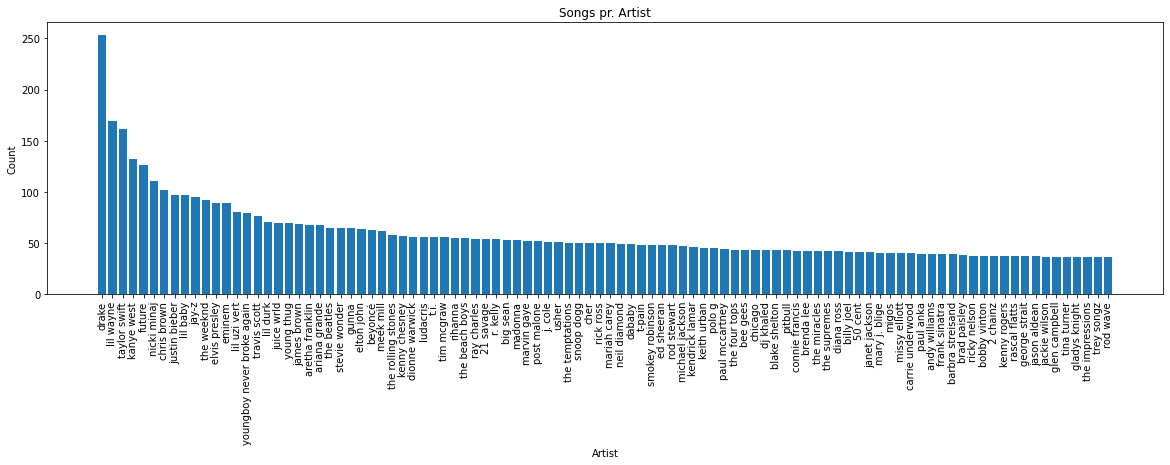

In [313]:
sorted_artists = {k: v for k, v in sorted(artist_count.items(), key=lambda item: item[1], reverse=True) if v > 35}
#for k, v in sorted_artists.items():
#    print(k + ':', v)

plt.figure(figsize=(20,5))
plt.bar(*zip(*sorted_artists.items()))
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Songs pr. Artist')
plt.show()

In [314]:
artist_colab_count['wind']

defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {})

In [315]:
artist_count['wind']

0

In [316]:
regroupings = set()

for artist_a, songs_a in artist_count.items():
    colabs = [artist_a]
    for artist_b, songs_b in artist_colab_count[artist_a].items():
        if songs_b == artist_count[artist_b] == songs_a  and songs_a > 2:
            colabs.append(artist_b)
    if len(colabs) > 1:
        regroupings.add((songs_a, tuple(sorted(colabs))))

In [308]:
for i in song_data.index.values:
    for num, group in regroupings:
        if group[0] in song_data.artists[i]:
            print(f'Artists before: {song_data.artists[i]}')
            for g in group:
                song_data.artists[i].remove(g)
            song_data.artists[i].append("_".join(group))
            print(f'Artists after: {song_data.artists[i]}')
            print("")

Artists before: ['jan', 'dean']
Artists after: ['dean_jan']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['jan', 'dean']
Artists after: ['dean_jan']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['jan', 'dean']
Artists after: ['dean_jan']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists before: ['hank ballard', 'the midnighters']
Artists after: ['hank ballard_the midnighters']

Artists b

Artists before: ['brenda', 'the tabulations']
Artists after: ['brenda_the tabulations']

Artists before: ['peaches', 'herb']
Artists after: ['herb_peaches']

Artists before: ['peter', 'gordon']
Artists after: ['gordon_peter']

Artists before: ['junior walker', 'the all stars']
Artists after: ['junior walker_the all stars']

Artists before: ['simon', 'garfunkel']
Artists after: ['garfunkel_simon']

Artists before: ['brenda', 'the tabulations']
Artists after: ['brenda_the tabulations']

Artists before: ['martha reeves', 'the vandellas']
Artists after: ['martha reeves_the vandellas']

Artists before: ['the mamas', 'the papas']
Artists after: ['the mamas_the papas']

Artists before: ['peaches', 'herb']
Artists after: ['herb_peaches']

Artists before: ['the mamas', 'the papas']
Artists after: ['the mamas_the papas']

Artists before: ['brenda', 'the tabulations']
Artists after: ['brenda_the tabulations']

Artists before: ['martha reeves', 'the vandellas']
Artists after: ['martha reeves_the v

Artists before: ['loggins', 'messina']
Artists after: ['loggins_messina']

Artists before: ['delaney', 'bonnie']
Artists after: ['bonnie_delaney']

Artists before: ['cornelius brothers', 'sister rose']
Artists after: ['cornelius brothers_sister rose']

Artists before: ['loggins', 'messina']
Artists after: ['loggins_messina']

Artists before: ['harold melvin', 'the blue notes']
Artists after: ['harold melvin_the blue notes']

Artists before: ['emerson', 'lake', 'palmer']
Artists after: ['palmer', 'emerson_lake']

Artists before: ['simon', 'garfunkel']
Artists after: ['garfunkel_simon']

Artists before: ['harold melvin', 'the blue notes']
Artists after: ['harold melvin_the blue notes']

Artists before: ['blood', 'sweat', 'tears']
Artists after: ['blood_sweat_tears']

Artists before: ['loggins', 'messina']
Artists after: ['loggins_messina']

Artists before: ['simon', 'garfunkel']
Artists after: ['garfunkel_simon']

Artists before: ['cornelius brothers', 'sister rose']
Artists after: ['cor

Artists before: ['hall', 'oates']
Artists after: ['hall_oates']

Artists before: ['earth', 'wind', 'fire']
Artists after: ['earth_fire_wind']

Artists before: ['hall', 'oates']
Artists after: ['hall_oates']

Artists before: ['earth', 'wind', 'fire']
Artists after: ['earth_fire_wind']

Artists before: ['huey lewis', 'the news']
Artists after: ['huey lewis_the news']

Artists before: ['hall', 'oates']
Artists after: ['hall_oates']

Artists before: ['simon', 'garfunkel']
Artists after: ['garfunkel_simon']

Artists before: ['huey lewis', 'the news']
Artists after: ['huey lewis_the news']

Artists before: ['ashford', 'simpson']
Artists after: ['ashford_simpson']

Artists before: ['hall', 'oates']
Artists after: ['hall_oates']

Artists before: ['crosby', 'stills', 'nash']
Artists after: ['crosby_nash_stills']

Artists before: ['huey lewis', 'the news']
Artists after: ['huey lewis_the news']

Artists before: ['crosby', 'stills', 'nash']
Artists after: ['crosby_nash_stills']

Artists before: [

Artists before: ['mumford', 'sons']
Artists after: ['mumford_sons']

Artists before: ['maddie', 'tae']
Artists after: ['maddie_tae']

Artists before: ['big', 'rich']
Artists after: ['big_rich']

Artists before: ['jussie smollett', 'empire cast']
Artists after: ['empire cast_jussie smollett']

Artists before: ['jussie smollett', 'yazz', 'empire cast']
Artists after: ['yazz', 'empire cast_jussie smollett']

Artists before: ['estelle', 'jussie smollett', 'empire cast']
Artists after: ['estelle', 'empire cast_jussie smollett']

Artists before: ['mumford', 'sons']
Artists after: ['mumford_sons']

Artists before: ['maddie', 'tae']
Artists after: ['maddie_tae']

Artists before: ['dove cameron', 'sofia carson', 'booboo stewart', 'cameron boyce']
Artists after: ['dove cameron', 'sofia carson', 'booboo stewart_cameron boyce']

Artists before: ['booboo stewart', 'cameron boyce', 'mitchell hope', 'sofia carson']
Artists after: ['mitchell hope', 'sofia carson', 'booboo stewart_cameron boyce']

Arti

In [342]:
song_data.to_pickle("songData.df")

In [341]:
for i in song_data.index.values:
    if 'yungstar' in song_data.artists[i]:
        print(song_data.title[i])
        print(len(song_data.lyrics[i]))
#         song_data = song_data.drop(i)

Wanna Be a Baller
5070
